### БИБЛИОТЕКА АЛГОРИТМОВ МАШИННОГО ОБУЧЕНИЯ ***SCIKIT-LEARN***

In [1]:
# ИМПОРТИРУЕМ БАЗОВЫЕ БИБЛИОТЕКИ

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# ИМПОРТИРУЕМ БИБЛИОТЕКИ ДЛЯ ОСУЩЕСТВЛЕНИЯ МАШИННОГО ОБУЧЕНИЯ

from ipywidgets import Image
from io import StringIO
import pydotplus #pip install pydotplus
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier, export_graphviz

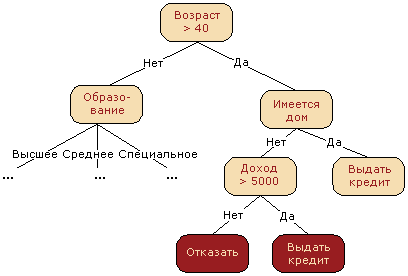

In [3]:
# ПРИМЕР ЛОГИКИ РАБОТЫ ДЕРЕВА РЕШЕНИЙ
import PIL
# from PIL import Image
PIL.Image.open("picture_decision_tree.gif")

In [4]:
# ЗАГРУЖАЕМ ФАЙЛ

df = pd.read_csv('health.csv', index_col='id')
df.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [5]:
# ПОЛУЧАЕМ ИНФОРМАЦИЮ О НАБОРЕ ДАННЫХ

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 70000 entries, 0 to 99999
Data columns (total 12 columns):
age            70000 non-null int64
gender         70000 non-null int64
height         70000 non-null int64
weight         70000 non-null float64
ap_hi          70000 non-null int64
ap_lo          70000 non-null int64
cholesterol    70000 non-null int64
gluc           70000 non-null int64
smoke          70000 non-null int64
alco           70000 non-null int64
active         70000 non-null int64
cardio         70000 non-null int64
dtypes: float64(1), int64(11)
memory usage: 6.9 MB


In [6]:
# ПЕРЕВОДИМ ПОКАЗАТЕЛЬ ВОЗРАСТА ИЗ ДНЕЙ В ГОДЫ

df['age_years'] = (df.age / 365.25).astype('int')

In [7]:
# ПРЕДСТАВЛЯЕМ НЕКОТОРЫЕ КАТЕГОРИАЛЬНЫЕ ПЕРЕМЕННЫЕ В ВИДЕ НАБОРА ФИКТИВНЫХ ПЕРЕМЕННЫХ

train_df = pd.get_dummies(df, columns=['cholesterol', 
                                       'gluc']).drop(['age','cardio'],
                                                     axis=1)
target = df.cardio

In [8]:
train_df.head()

,gender,height,weight,ap_hi,ap_lo,smoke,alco,active,age_years,cholesterol_1,cholesterol_2,cholesterol_3,gluc_1,gluc_2,gluc_3
id,,,,,,,,,,,,,,,
0,2,168,62.0,110,80,0,0,1,50,1,0,0,1,0,0
1,1,156,85.0,140,90,0,0,1,55,0,0,1,1,0,0
2,1,165,64.0,130,70,0,0,0,51,0,0,1,1,0,0
3,2,169,82.0,150,100,0,0,1,48,1,0,0,1,0,0
4,1,156,56.0,100,60,0,0,0,47,1,0,0,1,0,0


##### СТРОИМ КЛАССИФИКАТОР НА ОСНОВЕ АЛГОРИТМА ДЕРЕВА РЕШЕНИЙ

In [9]:
# ДЕЛИМ НАБОР ДАННЫХ НА ОБУЧАЮЩУЮ И ТЕСТОВУЮ ВЫБОРКИ 
# (КАК ПО ФАКТОРАМ, ТАК И ПО РЕЗУЛЬТАТИВНОЙ ПЕРЕМЕННОЙ)

X_train, X_valid, y_train, y_valid = train_test_split(train_df.values, target.values,
                                                     test_size=.3, random_state=17)

In [10]:
# СОЗДАЕМ ЭКЗЕМПЛЯР КЛАССИФИКАТОРА "ДЕРЕВО РЕШЕНИЙ" И ОБУЧАЕМ ЕГО

tree = DecisionTreeClassifier(max_depth=3, random_state=17).fit(X_train, 
                                                                y_train)

In [11]:
# СМОТРИМ ГРАФИК ПОЛУЧИВШЕГОСЯ ДЕРЕВА РЕШЕНИЙ

dot_data = StringIO()
export_graphviz(tree, feature_names=train_df.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x01\x00\x00\x01\xf1\x08\x06\x00\x00\x00DE\x1cg\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd{\\\x94e\xfe\xff\xf17\xa3\x96e\x8al\x85\x94EV\xae\xe6v`\xd9vM+1\t\x0f\x148\x9e#\xf8\xe6f\xc5B~q\xad\x8c\xdfF\x8b\xb3~\x91N_e\xb3,\x83\xf0\x9bF\x01\xd3\x9a\x19\x0e\xa9\xa5Ab\x1a\xcbfF\xbaYf-\x92\x96M\xba8\x9ai\'\xf8\xfd\xc1\xce\x1d\x0330\xc8a8\xbc\x9e\x8f\x07\x0f\xe7\xbe\xef\xeb\xbe\xee\xcf\x8d\xf0x\xe8\xf5\xb9\xae\xcf\xe5WSSS#\x00\x00\x00\x00\x00\x00\x00\x00\xd0\xd5$\x99|\x1d\x01\x00\x00\x00\x00\x00\x00\x00\x00h\x1b$\x01\x00\x00\x00\x00\x00\x00\x00\x00\xe8\xa2H\x02\x00\x00\x00\x00\x00\x00\x00\x00\xd0E\xf5\xf4u\x00\x00\x00\x00\xe8\x1e~\xfc\xf1G\xad]\xbbV?\xfd\xf4\x93\xafC\x01|\xa6G\x8f\x1e\x9a8q\xa2z\xf6\xe4\xbfb\x00\x00\x00h\x1f\xfc\xcb\x13\x00\x00\x00\xed\xa2\xb0\xb0PS\xa7N\xf5u\x18\x80\xcf\xadY\xb3F\x93&M\xf2u\x18\x00\x00\x00\xe8&H\x02\x00\x00\x00\xa0]|\xfb\xed\xb7\x92\xa4\xea\xeaj\x1fG\x02\xf8\x8e\xc9d2~\x17\x00\x00\x00\x80\xf6\xc0\x9e\x00\x00\x00\x00\x00\x00\x00\x00\x00tQ$\x01\x00\x00\x00\x00\x00\x00\x00\x00\xe8\xa2H\x02\x00\x00\x00\x00\x00\x00\x00\x00\xd0E\x91\x04\x00\x00\x00\x00\x00\x00\x00\x00\xa0\x8b"\t\x00\x00\x00\x00\x00\x00\x00\x00@\x17E\x12\x00\x00\x00\x00\x00\x00\x00\x00\x80.\x8a$\x00\x00\x00\x00\xe0#v\xbb]V\xabUf\xb3\xb9\xd1v\x16\x8bE\x16\x8b\xa5\x9d\xa2\x02\x00\x00\x00\xd0\x95\x90\x04\x00\x00\x00\x00|d\xc1\x82\x05\x8a\x8d\x8d\x95\xcdf\xf3u(\xcd\xe2p8TZZ\xaa\xec\xecl\x8f\t\x8c\xca\xcaJ\xcd\x9e=[&\x93I\xb3g\xcfVQQQ\x836v\xbb]\xd9\xd9\xd92\x99L2\x99L\xb2Z\xad^\xc7P^^n\xdc\xe7|\x06\x00\x00\x00\x80\x86H\x02\x00\x00\x00\x00>\xb2l\xd92\xaf\xda\xa5\xa5\xa5)--\xed\x94\x9fS^^\xde\xaa+\t222\xb4n\xdd:%$$\xb8M`8\x1c\x0e\x95\x97\x97k\xd9\xb2e\xaa\xaa\xaaRXX\x98"""\\\xda:\x1c\x0e\xc5\xc7\xc7K\x92\xaa\xab\xabu\xf0\xe0A\xe5\xe7\xe7{\x1dgYY\x99\xcbqddd\x0b\xde\x08\x00\x00\x00\xe8\xba\xfcjjjj|\x1d\x04\x00\x00\x00\xba\xbe\xbc\xbc<\xc5\xc5\xc5\xa9\xba\xba\xda\xd7\xa1t(&S\xed\xbc\x9c\xd6\xfe\xbe\xd8\xedv\x15\x15\x15\xa9\xa4\xa4Daaa\n\x0f\x0fW```\xab>\xc3S\xec6\x9bM\xd1\xd1\xd1\x8d\xb6\xb5Z\xad\x8a\x8d\x8dUUU\x95\xfc\xfd\xfd%\xd5&+BCC\xb5i\xd3&\x85\x87\x877\xfalw\xcf\xe8\x0cL&\x93rss\x15\x1b\x1b\xeb\xebP\x00\x00\x00\xd0=$\xb1\x12\x00\x00\x00\x00\xa8\xc3\xe1p\xb8\x94\xa8\xb1X,\xb2\xdb\xed\x92j\x07\xd6m6\x9bQ\x02\xc7\xd9n\xf6\xec\xd9\xda\xb3gO\x8b\x9fm\xb3\xd9\x8c\xfe\xea>\xd3\x9b}\x03\x9c\x9c\xb3\xfe\x9fz\xea)\r\x1b6L\xcb\x96-SLLL\xab\'\x00\x1a\xe3ip>11\xd1\xf8\x9c\x9f\x9f/IF\x02@\x92\x06\r\x1a$Iz\xf9\xe5\x97\x1b\xed\xbf\xb2\xb2Rf\xb3Y\x16\x8bE\xa5\xa5\xa5-\x8c\x16\x00\x00\x00\xe8\xdaz\xfa:\x00\x00\x00\x00\xa0#IIIQff\xa6\x0e\x1e<\xa8\x93\'Oj\xd0\xa0A:t\xe8\x90\x96-[\xa6\xa0\xa0 \xa3]ii\xa9\xe2\xe3\xe35c\xc6\x0c\xa5\xa4\xa4\xe8\xb2\xcb.\xd3G\x1f}\xa4!C\x86\x9c\xd2sKKK\x15\x1d\x1d\xad\x8f>\xfaH\x97]v\x99\xa4\xdarA\xf1\xf1\xf1M\xee\x19P\x7f\xd6\x7fRR\x92\xc7A\x7f\xe7\x8c\xfc\xa6\xb4\xe6\xca\x04\x87\xc3!\xc9\xb5d\x8f\xbbwr&\x04233\x1b-\x95T^^.IJOOWzz\xba\xa2\xa3\xa3\x95\x9d\x9d\xdd\xae\x89\x0e\x00\x00\x00\xa0\xb3`%\x00\x00\x00\x00P\xc79\xe7\x9c\xa3\xc4\xc4D\x05\x06\x06*88XR\xed\xa0\xb4\xe4:0>b\xc4\x08I\xb5\x03\xd7\t\t\t\x92\xdc\x0fl{\xcb\xd9\x9f3\x89\xe0|fAAA\x93\xf7\x06\x05\x05\xe9\xc0\x81\x03z\xe4\x91G\x9a\x9c\xf5_]]\xed\xd5Wk\xda\xbe}\xbb\xa2\xa3\xa3\x15\x16\x16f\x9cs\xae\n8\x95\x15\x14\xd1\xd1\xd1\xaa\xaa\xaa\xd2\x8e\x1d;\x94\x9a\x9a*\x9b\xcd\xe6\xd5\xf7\t\x00\x00\x00\xe8\x8eH\x02\x00\x00\x00\x00u\xa4\xa5\xa5i\xd9\xb2e\xaa\xac\xacTFF\x86W\xf7\x84\x84\x84H\x92\x92\x93\x93\xdb24\x8f\x0e\x1e<\xa8\x81\x03\x07*%%EV\xab\xd5(%\xd4Q<\xf1\xc4\x13JIIq)\xfd3s\xe6LI\xd2\x92%K\x8c\x95\x02\xce\x19\xfe\x8b\x16-j\xb2O\x7f\x7f\x7f\x85\x84\x84(--MYYY*,,l\x83\xc8\x01\x00\x00\x80\xce\x8f$\x00\x00\x00\x00POvv\xb6\xe6\xcc\x99\xd3i6\x9e\r\x0c\x0cTLL\x8c\x96-[\xa6a\xc3\x86\xe9\xa9\xa7\x9e\x92\xc5b1\x06\xd5\xebr\xeeu\xd0\xd4Wk\xb1Z\xad\x8a\x8a\x8a2V:8\x8d\x181B\x9b6m\xd2\x81\x03\x07\x14\x10\x10\xa0\xec\xecl\x1d>|X\x92\x14\x11\x11\xd1\xacg\xcc\x981\xa3E\xab0\x00\x00\

In [12]:
# ОСУЩЕСТВЛЯЕМ ПРОГНОЗ (ПРЕДСКАЗАНИЕ) НА ДАННЫХ ТЕСТОВОЙ ВЫБОРКИ

tree_pred_valid = tree.predict(X_valid)

In [13]:
# ОЦЕНИВАЕМ КАЧЕСТВО ПРОГНОЗА НА ОСНОВЕ ПОКАЗАТЕЛЯ ACCURACY (ВЕРНОСТЬ), ОНА ОПРЕДЕЛЯЕТСЯ КАК
# ДОЛЯ ВЕРНО КЛАССИФИЦИРОВАННЫХ ЕДИНИЦ В ЦЕЛОМ ПО ВСЕЙ ТЕСТОВОЙ СОВОКУПНОСТИ 

tree_acc_valid = accuracy_score(y_valid, tree_pred_valid)
print('Accuracy: {acc:.3f}'.format(acc=tree_acc_valid))

Accuracy: 0.721


##### ПЫТАЕМСЯ УЛУЧШИТЬ КАЧЕСТВО МОДЕЛИ КЛАССИФИКАЦИИ

In [14]:
# ПРОИЗВОДИМ ПОДБОР ГИПЕРПАРАМЕТРА "ГЛУБИНА ДЕРЕВА" ПО СЕТКЕ ЗНАЧЕНИЙ (ОТ 2 ДО 7)
# И ОБУЧАЕМ ДАННЫЕ МЕТОДОМ КРОСС-ВАЛИДАЦИИ (РАЗБИВАЯ ДАННЫЕ НА 5 ГРУПП - Т.Н. "ФОЛДОВ")

# %%time
tree_params = {'max_depth': list(range(2, 11))}

tree_grid = GridSearchCV(DecisionTreeClassifier(random_state=17), 
                         tree_params, 
                         cv=5, scoring='accuracy') 

tree_grid.fit(X_train, y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=17,
            splitter='best'),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='accuracy', verbose=0)

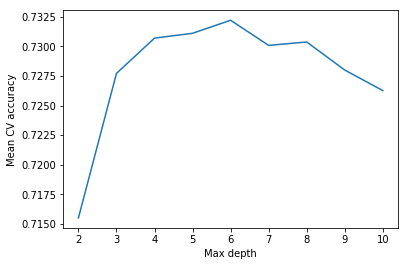

In [15]:
# СТРОИМ ГРАФИК ЗАВИСИМОСТИ ТОЧНОСТИ ПРЕДСКАЗАНИЯ ОТ ПОКАЗАТЕЛЯ ГЛУБИНЫ ДЕРЕВА РЕШЕНИЙ

plt.plot(tree_params['max_depth'], 
         tree_grid.cv_results_['mean_test_score'])
plt.xlabel('Max depth')
plt.ylabel('Mean CV accuracy');

In [16]:
# ПЕЧАТАЕМ ЛУЧШИЕ ЗНАЧЕНИЯ ПАРАМЕТРА И СООТВЕТСТУЮЩЕЕ ЕМУ ЗНАЧЕНИЕ ПОКАЗАТЕЛЯ ACCURACY,
# ПОЛУЧЕННЫЕ НА ОБУЧАЮЩЕЙ ВЫБОРКЕ

print("Best params:", tree_grid.best_params_)
print("Best cross validaton score", tree_grid.best_score_)

Best params: {'max_depth': 6}
Best cross validaton score 0.732204081632653


In [17]:
# ТЕСТИРУЕМ ПОЛУЧЕННУЮ МОДЕЛЬ И СЧИТАЕМ ПОКАЗАТЕЛЬ ACCURACY

tuned_tree_acc_valid = accuracy_score(y_valid, 
                                      tree_grid.predict(X_valid))
print('Accuracy {acc:.3f}'.format(acc=tuned_tree_acc_valid))

Accuracy 0.726


In [18]:
# ВЫЯСНЯЕМ, КАК ИЗМЕНИЛОСЬ ЗНАЧЕНИЕ ПОКАЗАТЕЛЯ ACCURACY

delta = (tuned_tree_acc_valid - tree_acc_valid) * 100
print(('Абсолютный прирост показателя Accuracy составляет {:.1f} п.п.').format(delta))
rate = (tuned_tree_acc_valid / tree_acc_valid - 1) * 100
print(('\nТемп прироста показателя Accuracy составляет {:.1f} %').format(rate))

Абсолютный прирост показателя Accuracy составляет 0.4 п.п.

Темп прироста показателя Accuracy составляет 0.6 %


##### ПРОРАНЖИРУЕМ ПРИЗНАКИ  ПО СТЕПЕНИ ИХ ВАЖНОСТИ ДЛЯ ОСУЩЕСТВЛЕНИЯ КЛАССИФИКАЦИИ

In [19]:
# СОЗДАДИМ ПОДНАБОР ИЗ ОБСЛЕДУЕМЫХ, ВХОДЯЩИХ В ЗОНУ РИСКА - ПОЛОЖИТЕЛЬНО ОТВЕТИВШИХ 
# НА ВОПРОС О КУРЕНИИ И ПОЭТОМУ ИМЕЮЩИХ НАИБОЛЬШУЮ ВЕРОЯТНОСТЬ НАЛИЧИЯ ССЗ

sub_df = pd.DataFrame(df.smoke.copy())
sub_df['male']  = df.gender - 1

# ОТБИРАЕМ ОТБИРАЕМ ИЗ  СОСТАВА КУРЯЩИХ ТЕМ, КТО В ВОЗРАСТЕ 45-65 ЛЕТ И ДЕЛИМ НА ВОЗРАСТНЫЕ ГРУППЫ 
sub_df['age_45_50'] = ((df.age_years >= 45) 
                       & (df.age_years < 50) ).astype('int')
sub_df['age_50_55'] = ((df.age_years >= 50) 
                       & (df.age_years < 55) ).astype('int')
sub_df['age_55_60'] = ((df.age_years >= 55) 
                       & (df.age_years < 60) ).astype('int')
sub_df['age_60_65'] = ((df.age_years >= 60) 
                       & (df.age_years < 65) ).astype('int')

# КРОМЕ ТОГО, ДЕЛИМ КУРЯЩИХ НА ГРУППЫ УРОВНЮ АРТЕРИАЛЬНОГО ДАВЛЕНИЯ 
sub_df['ap_hi_120_140'] = ((df.ap_hi >= 120) 
                           & (df.ap_hi < 140)).astype('int')
sub_df['ap_hi_140_160'] = ((df.ap_hi >= 140) 
                           & (df.ap_hi < 160)).astype('int')
sub_df['ap_hi_160_180'] = ((df.ap_hi >= 160) 
                           & (df.ap_hi < 180)).astype('int')

# НАКОНЕЦ, ПОДРАЗДЕЛЯЕМ КУРЯЩИХ НА ГРУППЫ ПО УРОВНЮ ХОЛЕСТЕРИНА
sub_df['chol=1'] = (df.cholesterol == 1).astype('int')
sub_df['chol=2'] = (df.cholesterol == 2).astype('int')
sub_df['chol=3'] = (df.cholesterol == 3).astype('int')

In [20]:
# СМОТРИМ НА ПЕРВЫЕ СТРОКИ ПОЛУЧИВШЕГОСЯ НАБОРА ДАННЫХ

sub_df.head()

,smoke,male,age_45_50,age_50_55,age_55_60,age_60_65,ap_hi_120_140,ap_hi_140_160,ap_hi_160_180,chol=1,chol=2,chol=3
id,,,,,,,,,,,,
0,0,1,0,1,0,0,0,0,0,1,0,0
1,0,0,0,0,1,0,0,1,0,0,0,1
2,0,0,0,1,0,0,1,0,0,0,0,1
3,0,1,1,0,0,0,0,1,0,1,0,0
4,0,0,1,0,0,0,0,0,0,1,0,0


In [21]:
# СОЗДАЕМ ЕЩЕ ОДИН ЭКЗЕМПЛЯР КЛАССИФИКАТОРА НА ОСНОВЕ ДЕРЕВА РЕШЕНИЙ

tree = DecisionTreeClassifier(max_depth=3, 
                              random_state=17).fit(sub_df, target)

In [22]:
# СТРОИМ ГРАФИК ДЕРЕВА РЕШЕНИЙ И ВЫЯСНЯЕМ ПРИОРИТЕТ ПРИЗНАКОВ ПО ИХ ВАЖНОСТИ ДЛЯ КЛАССИФИКАТОРА

dot_data = StringIO()
export_graphviz(tree, feature_names=sub_df.columns, 
                out_file=dot_data, filled=True)
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
Image(value=graph.create_png())

Image(value=b'\x89PNG\r\n\x1a\n\x00\x00\x00\rIHDR\x00\x00\x06\x00\x00\x00\x01\xf1\x08\x06\x00\x00\x00\xab\x87wY\x00\x00\x00\x06bKGD\x00\xff\x00\xff\x00\xff\xa0\xbd\xa7\x93\x00\x00 \x00IDATx\x9c\xec\xdd}\\Tu\xfe\xf7\xf1\xf7\xa4\x997)t\xa3\xa8\x15\xe5U\x17\xe6\xd5^\xe2Z\x9a\xae%\x86n\x94\xc6h\x9b\xb2\xa2\xd9\xdd\x8a\x0b\x99\xbb\xae\xd2\xae\xb6\xcc\x9a\x0b=\xec\x06[73\xf8A\x9b\xb9\x04Ljk:\xeb\xed"\x89f\xb2\x9a&^\xb9\xded)c\x99\x8e\x96Nvc\xae5\xd7\x1f4\'\x06\x06\x18`\x86\x81\xe1\xf5|<x8\xe7\x9c\xef\xf9\x9e\xcf9\x8e=\xe8\xfb\xf9\x9e\xcf\xd7\xe4r\xb9\\\x02\x00\x00\x00\x00\x00\x00\x00\x00!\xe5\xa2`\x07\x00\x00\x00\x00\x00\x00\x00\x00\x00\xfc\x8f\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00!\x88\x04\x00\x00\x00\x00\x00\x00\x00\x00\x00!\xa8m\xb0\x03\x00\x00\x00\x00*\xbbp\xe1\x82V\xadZ\xa5\xef\xbe\xfb.\xd8\xa1\x00A\xd3\xa6M\x1b\x99\xcdf\xb5m\xcb\xff\xb2\x01\x00\x00\xa0\xe1\xf8m\x12\x00\x00\x00\xcd\xca?\xff\xf9O\xddw\xdf}\xc1\x0e\x03\x08\xba\x15+Vh\xcc\x981\xc1\x0e\x03\x00\x00\x00-\x18\t\x00\x00\x00\x004+_\x7f\xfd\xb5$\xc9\xe5r\x059\x12 xL&\x93\xf1o\x01\x00\x00\x00h(\xd6\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x04\x91\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x04\x91\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x04\x91\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x04\x91\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x04\x91\x00\x00\x00\x00\x00\x00\x00\x00\x00 \x04\x91\x00\x00\x00\x00\x00\xea\xc9\xe1p\xc8j\xb5\xcal6\xd7\xda\xceb\xb1\xc8b\xb14QT\x00\x00\x00\x00\xe0\x89\x04\x00\x00\x00\x00POs\xe6\xccQbb\xa2l6[@\xfaw:\x9d*--Unnn\x9dI\x06\xb7\xdc\xdc\\\x99L\xa6j\xfbm6\x9b\xccf\xb3\xccfs\xa3\xe2\xadoLeeeF\xdb\xaaq\xf9+\xa6@jh\x8ceee2\x99L\xc6OJJJ\x00\xa3\x04\x00\x00\x00j\xd76\xd8\x01\x00\x00\x00\x00-MVV\x96\xb2\xb3\xb3\xebl\x97\x9e\x9e\xde\xa0\xfe333%I\x19\x19\x19>\xb5/++\xd3\x94)S\xaa\xed\xb7Z\xad*((P^^\x9e$i\xd6\xacY:~\xfc\xb8\x92\x92\x92\x02\x1a\xd3\xfc\xf9\xf3URR\xa2\xa4\xa4$\xbd\xf8\xe2\x8bZ\xb5jU@br+++\xd3\xf2\xe5\xcb\x1b\xfc\xbc\xabjL\x8c\xdb\xb7o\xf7\xd8\x1e9r\xa4_b\x02\x00\x00\x00\x1a\xc2\xe4r\xb9\\\xc1\x0e\x02\x00\x00\x00p+((\xd0\xc4\x89\x13\xd5\xdc\x7fMu\xcfj\x0fd\x9c\xbe\\\xc3\xe9t*33\xd3\x18\x98w\xb7\xb5\xdb\xed\xba\xf6\xdak\xb5m\xdb6\r\x1a4HR\xc5@y\xbf~\xfd\xb4{\xf7nEGG\x07$\xa6\x94\x94\x14]y\xe5\x95JMMUXX\x98\xc71\x7f\xc6\xe4p8T\\\\\xac\x92\x92\x12\xc5\xc4\xc4(66V\xdd\xbauk\xd0=\xf93F\x9b\xcd\xa6\xf8\xf8\xf8F\xc7a2\x99\x94\x9f\x9f\xaf\t\x13&4\xba/\x00\x00\x00\xb4^\x94\x00\x02\x00\x00@Hp:\x9dF\x19\x1c\x93\xc9$\x8b\xc5"\x87\xc3!\xa9b\xb0\xd8]\xd2E\xfa\xb1\\NJJ\x8a\x0e\x1e<\xd8\xe8k\xdbl6\xa3\xbf\xca\xd7\xf4e\x9d\x80\xc6z\xf9\xe5\x975m\xda\xb4j\xfb\xdfy\xe7\x1dIR\xcf\x9e=\x8d}=z\xf4\x90T}\x96\xba\xbf\xb8\xd7;HOO\xaf6\xf8\xef\xaf\x98\xca\xca\xcad\xb1X\xb4p\xe1B\xf5\xe9\xd3GYYY\x1a?~\xbc_\x06\xff\x1b\x1b\xa3\xddn\x97\xd9l\x96\xc5bQii\xa9_\xe2\x01\x00\x00\x00\x1a\x83\x04\x00\x00\x00\x00B\xc2\xacY\xb34e\xca\x14\x9d8qB\xe5\xe5\xe5\xca\xc8\xc8\xd0\x9c9s$I\x11\x11\x11F-\xf7\xd2\xd2R%%%\xe9\xcc\x993\x92\xa4\xde\xbd{7*\tPZZ\xaa\xf8\xf8x\x1d8p@\xd9\xd9\xd9\xc65\'O\x9e\x1c\xd0u\x02$\xa9\xb8\xb8XC\x86\x0c\xf1:\xf8]RR"I\x8a\x8c\x8c4\xf6\xb9\xdb\x05"\xa6\xb2\xb22eddh\xe4\xc8\x91F\x82\xc5l6\xab\xb8\xb8\xb8\xd11\xb9\x93))))\xda\xb7o\x9f\xa6M\x9b\xa6\xf4\xf4t\xaf\xb3\xf1+\xd7\xdf\xaf\xed\xa7&\x8dyneee\x92*\xca$\r\x1e<Xf\xb3\xd9H\x08\x01\x00\x00\x00\xc1@\t \x00\x00\x004+\r-\x01d\xb1Xt\xea\xd4)eeeI\xaa^\xaa\xc6[\xe9\x1awi\x97\xcc\xccL\xcd\x9c9\xb3^\xd7\xf3\xd6\x9f/\xd7l\xec5\xdc\x1c\x0e\x87V\xae\\i\xd4\xa5\xf7\xf5\xda\x81\x8ai\xfe\xfc\xf9JMM5\xca\xe48\x9dN\xcd\x9a5K\xd9\xd9\xd9F9\x9d\x86\xc6d2\x99\x94\x99\x99\xa9\xc9\x93\'{}\xb3\xc0\x9f\x1a\xfb\xdc\x9cN\xa7\x8e\x1c9\xa2\xe5\xcb\x97+##C999\rZ\xdf\x80\x12@\x00\x00\x00\xf0\x07\x12\x00\x00\x00\x00hV\x1a\xbb\x06\x80\xddn\xd7\xb2e\xcb\x94\x9a\x9a*)p\x03\xe2\xc1N\x00\xe4\xe6\xe6z\x0c,\x07;\x01P[\x82%99YYYY\r\x8e)P\xf5\xfe\xbd\xf1\xe7s\xcb\xcd\xcd\x95\xcdf\xf3X\x04\xb9>q\x90\x00\x00\x00\x00@cQ\x02\x08\x00\x00\x00!#77W\x8f=\xf6\x98_\x16am\xcel6\x9b\xe2\xe2\xe2jmS\xdb3HNN\xf6wH^\xb9K\xf4dgg7*\xa6n\xdd\xbai\xfc\xf8\xf1\xca\xca\xcaR\x9f>}\xb4p\xe1BY

TO BE CONTINUED